# Visualizing Chipotle's Data

Thanks to Guilherme Samora (https://github.com/guipsamora) for data, inspiration, and some guidance. You can access the dataset here: https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

### Loading and preprocessing

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [21]:
chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep="\t")

In [22]:
#Columns we're dealing with:
chipo.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

Let's convert the item price from a string into a float so we can work with it later.

In [23]:
#Remove the dollar sign and convert to float
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x.replace('$','')))

### What are the most popular items?

In [24]:
top5 = chipo['item_name'].value_counts().sort_values().tail()

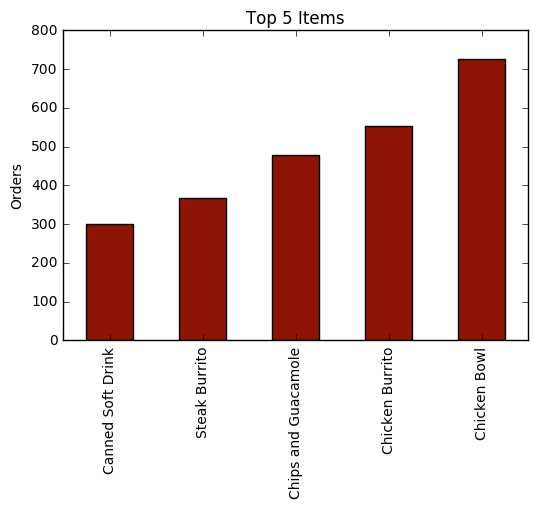

In [25]:
top5.plot(kind='bar', color='#8C1505')
plt.title('Top 5 Items')
plt.ylabel('Orders')

Yes, I found the Chipotle hex color!

### What's the distribution of order prices?

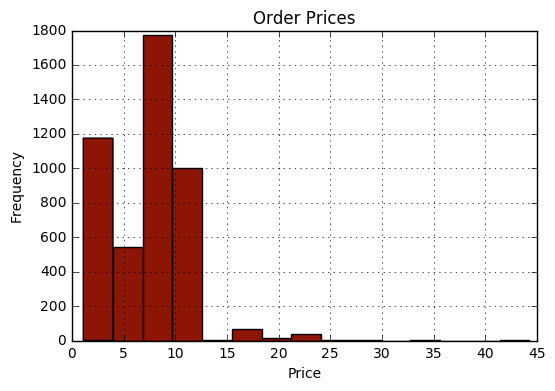

In [26]:
chipo['item_price'].hist(bins=15, color='#8C1505')
plt.title('Order Prices')
plt.ylabel('Frequency')
plt.xlabel('Price')

Let's turn this into a scatterplot so we can see the individual points with a higher order value.

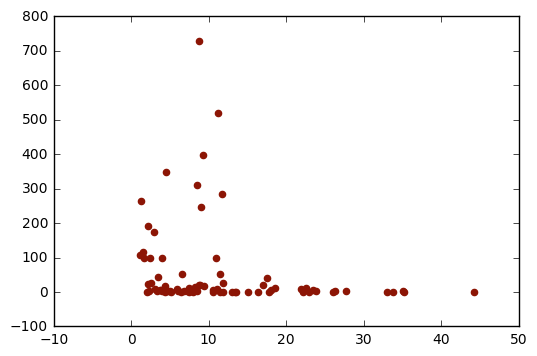

In [27]:
prices = chipo['item_price'].value_counts().sort_index()
plt.scatter(prices.index, prices, color='#8C1505')

Since some orders contained a quantity of > 1, we can look into period revenue by creating a revenue column, and looking at that distribution as well.

In [28]:
chipo['revenue'] = chipo['quantity'] * chipo['item_price']

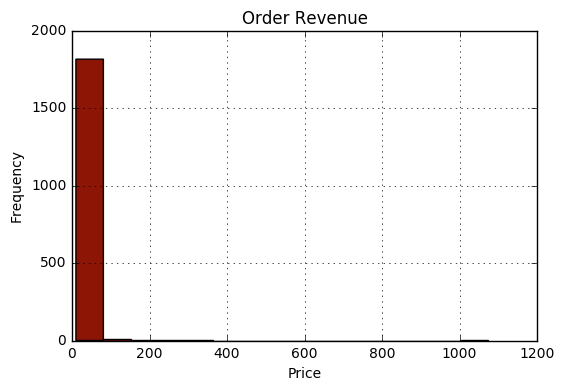

In [29]:
chipo.groupby('order_id').agg({'revenue': np.sum}).hist(bins=15, color='#8C1505')
plt.title('Order Revenue')
plt.ylabel('Frequency')
plt.xlabel('Price')

Oops, looks like there's a clear outlier here – a $1100 order! Let's take a look at it.

In [17]:
chipo.groupby('order_id').agg({'revenue': np.sum}).sort_values('revenue', ascending=False).head()

,revenue
order_id,
1443,1074.24
511,315.29
1559,246.00
1660,222.75
926,205.25


In [30]:
chipo[chipo['order_id'] == 1443]

,order_id,quantity,item_name,choice_description,item_price,revenue
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25,663.75
3599,1443,7,Bottled Water,NaN,10.50,73.50
3600,1443,1,6 Pack Soft Drink,[Coke],6.49,6.49
3601,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",33.75,101.25
3602,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",35.00,140.00
3603,1443,3,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",27.75,83.25
3604,1443,2,Bottled Water,NaN,3.00,6.00


Let's hope that was for a party, and not a messy breakup. Either way, let's remove it as an outlier and see what the distribution looks like.

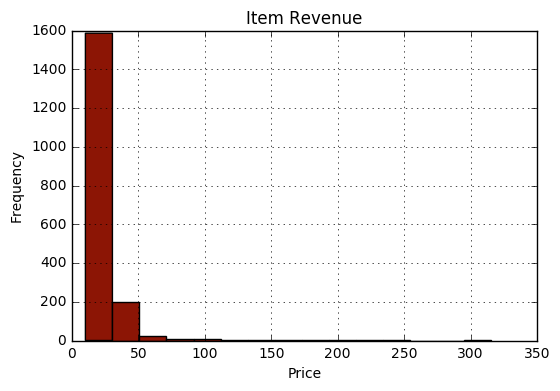

In [19]:
chipoSmall = chipo[chipo['order_id'] != 1443]
chipoSmall.groupby('order_id').agg({'revenue': np.sum}).hist(bins=15, color='#8C1505')
plt.title('Item Revenue')
plt.ylabel('Frequency')
plt.xlabel('Price')

Still a pretty long tail here. Let's see the top 20 orders by total size.

In [15]:
chipo.groupby('order_id').agg({'revenue': np.sum}).sort_values('revenue', ascending=False).head(20)

,revenue
order_id,
1443,1074.24
511,315.29
1559,246.00
1660,222.75
926,205.25
1786,197.70
1454,190.24
1449,164.31
1483,139.00


### How many choices are made in the typical order?

In [48]:
#Define a length function that deals with NaNs
def choicesLength(x):
    if x == 'None':
        return 0
    else:
        return(len(x.split(',')))

In [49]:
chipo['choice_size'] = chipo['choice_description'].fillna('None').apply(choicesLength)
chipo['choice_size'].describe()

count    4622.000000
mean        3.408481
std         2.739533
min         0.000000
25%         0.000000
50%         4.000000
75%         6.000000
max        10.000000
Name: choice_size, dtype: float64

### What are the items that people choose the most sides with?

In [50]:
combos = chipo.groupby('item_name').mean()['choice_size'].sort_values()

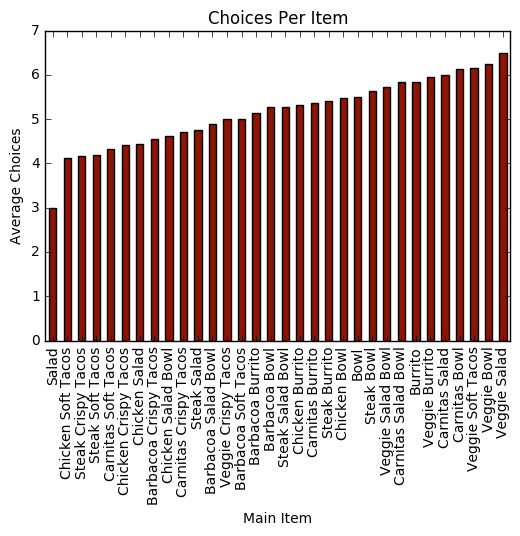

In [51]:
combos[combos > 2].plot(kind='bar', color='#8C1505')
plt.title('Choices Per Item')
plt.xlabel('Main Item')
plt.ylabel('Average Choices')

### Which items are typically ordered in the highest quantity?

First, let's narrow down the dataframe to items that have been ordered more than 10 times.

In [79]:
#Figure out which items have appeared more than 10 times in the dataframe
greaterThan10 = chipo['item_name'].value_counts().sort_values() > 10
#Create a list of items that have been ordered more than 10 times by grabbing the index
popular = greaterThan10[greaterThan10 == 1].index

In [94]:
#Create a new dataframe with only popular items in it
popularChipo = chipo[chipo['item_name'].isin(popular)]
#Group by item_name and take the mean of quantity ordered
quantities = popularChipo.groupby('item_name').mean()['quantity'].sort_values()

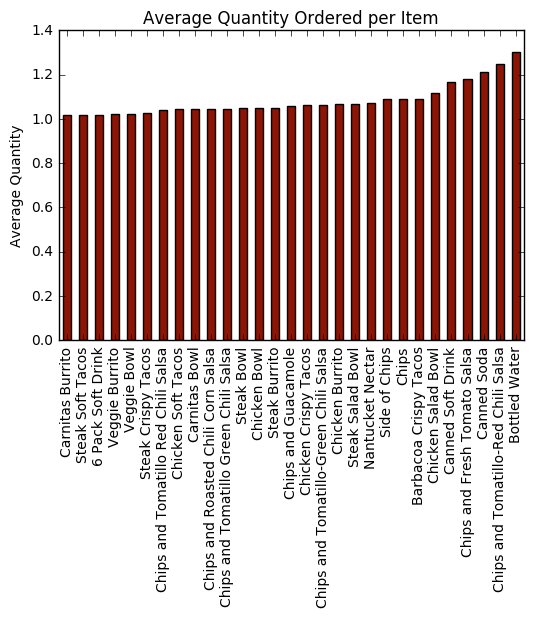

In [100]:
#Limit the mean quantity to > 1 to make the graph more readable
quantities[quantities > 1].plot(kind='bar', color='#8C1505')
plt.title('Average Quantity Ordered per Item')
plt.ylabel('Average Quantity')
plt.xlabel('')

Looks like the item ordered in the highest quantity is typically bottled water, with canned soda following in a close third. Chipotle is pretty salty.